In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

# IMPORTING THE CLEAN DATASET

In [2]:
df = pd.read_csv('Clean_Bengaluru_House_Data.csv')

In [3]:
df.head()

,Unnamed: 0,location,size,total_sqft,bath,price,bhk
0,0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [4]:
df['price_per_sqft'] = (df['price']*100000)/df['total_sqft']

In [5]:
df.head()

,Unnamed: 0,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [7]:
len(df.location.unique())

1304

In [8]:
df.location = df.location.apply(lambda x: x.strip())

In [9]:
df.head()

,Unnamed: 0,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [16]:
loc_stat = df.groupby('location')['location'].agg('count').sort_values(ascending = False)
print (loc_stat.to_string())

location
Whitefield                                            535
Sarjapur  Road                                        392
Electronic City                                       304
Kanakpura Road                                        266
Thanisandra                                           236
Yelahanka                                             210
Uttarahalli                                           186
Hebbal                                                176
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Bannerghatta Road                                     152
Hennur Road                                           150
7th Phase JP Nagar                                    149
Haralur Road                                          141
Electronic City Phase II                              131
Rajaji Nagar                                          106
Chandapura                                             98
Bella

In [19]:
len(loc_stat[loc_stat<=10])

1052

In [24]:
locations_with_less_than_10_datapoints= loc_stat[loc_stat<=10]
print (locations_with_less_than_10_datapoints.to_string())

location
BTM 1st Stage                                         10
Basapura                                              10
Sector 1 HSR Layout                                   10
Naganathapura                                         10
Kalkere                                               10
Nagadevanahalli                                       10
Nagappa Reddy Layout                                  10
Sadashiva Nagar                                       10
Gunjur Palya                                          10
Dairy Circle                                          10
Ganga Nagar                                           10
Dodsworth Layout                                      10
1st Block Koramangala                                 10
Chandra Layout                                         9
Jakkur Plantation                                      9
2nd Phase JP Nagar                                     9
Yemlur                                                 9
Mathikere             

In [27]:
df.location = df.location.apply(lambda x: 'other' if x in locations_with_less_than_10_datapoints else x)

len(df.location.unique())

242

In [29]:
df.sample(20)

,Unnamed: 0,location,size,total_sqft,bath,price,bhk,price_per_sqft
8911,8971,other,3 BHK,1488.0,2.0,65.00,3,4368.279570
5439,5474,Gottigere,2 BHK,1010.0,2.0,35.00,2,3465.346535
1341,1353,Yelahanka,2 BHK,1075.0,2.0,51.50,2,4790.697674
10609,10675,Electronic City Phase II,2 BHK,1155.0,2.0,57.00,2,4935.064935
4538,4568,Yelahanka New Town,3 BHK,1541.0,3.0,80.00,3,5191.434134
9274,9335,Thanisandra,2 BHK,933.0,2.0,55.00,2,5894.962487
4716,4746,R.T. Nagar,2 BHK,1235.0,2.0,65.00,2,5263.157895
11944,12015,Kereguddadahalli,2 BHK,800.0,2.0,33.00,2,4125.000000
9126,9187,Electronic City,2 BHK,1020.0,2.0,29.45,2,2887.254902
5234,5267,Vijayanagar,3 BHK,1300.0,2.0,75.00,3,5769.230769


# Removing outliers based on the size of the room and price_per_sqft

In [42]:
df[(df.total_sqft/df.bhk<300)].head()

,Unnamed: 0,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
57,58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
67,68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
69,70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [32]:
df.shape

(13246, 8)

In [40]:
#Removing all the data points that a total of sqft per room of less than 300
df1 = df[(df.total_sqft/df.bhk)>300]
print (df1.to_string())

       Unnamed: 0                     location        size  total_sqft  bath     price  bhk  price_per_sqft
0               0     Electronic City Phase II       2 BHK    1056.000   2.0    39.070    2     3699.810606
1               1             Chikka Tirupathi   4 Bedroom    2600.000   5.0   120.000    4     4615.384615
2               2                  Uttarahalli       3 BHK    1440.000   2.0    62.000    3     4305.555556
3               3           Lingadheeranahalli       3 BHK    1521.000   3.0    95.000    3     6245.890861
4               4                     Kothanur       2 BHK    1200.000   2.0    51.000    2     4250.000000
5               5                   Whitefield       2 BHK    1170.000   2.0    38.000    2     3247.863248
6               6             Old Airport Road       4 BHK    2732.000   4.0   204.000    4     7467.057101
7               7                 Rajaji Nagar       4 BHK    3300.000   4.0   600.000    4    18181.818182
8               8           

In [41]:
df1.shape

(12274, 8)

In [44]:
df.shape[0] - df1.shape[0]

972

# Removing outliers based on the price_per_sqft

In [49]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft < (m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)
        
    return df_out

df2 = remove_pps_outliers(df1)
df2.shape

(10016, 8)

In [51]:
# function to visualize the price of two and three bedroom houses in different locations
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    plt.scatter(bhk2.total_sqft,bhk2.price, color= 'blue', marker='o', label = 'bhk2')
    plt.scatter(bhk3.total_sqft,bhk3.price, color= 'red', marker='+', label= 'bhk3')
    plt.legend()
    plt.xlabel('total_sqft')
    plt.ylabel('price')
    plt.title(location)
    plt.show

In [53]:
df2.location.unique()

array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli',
       'Bommanahalli'

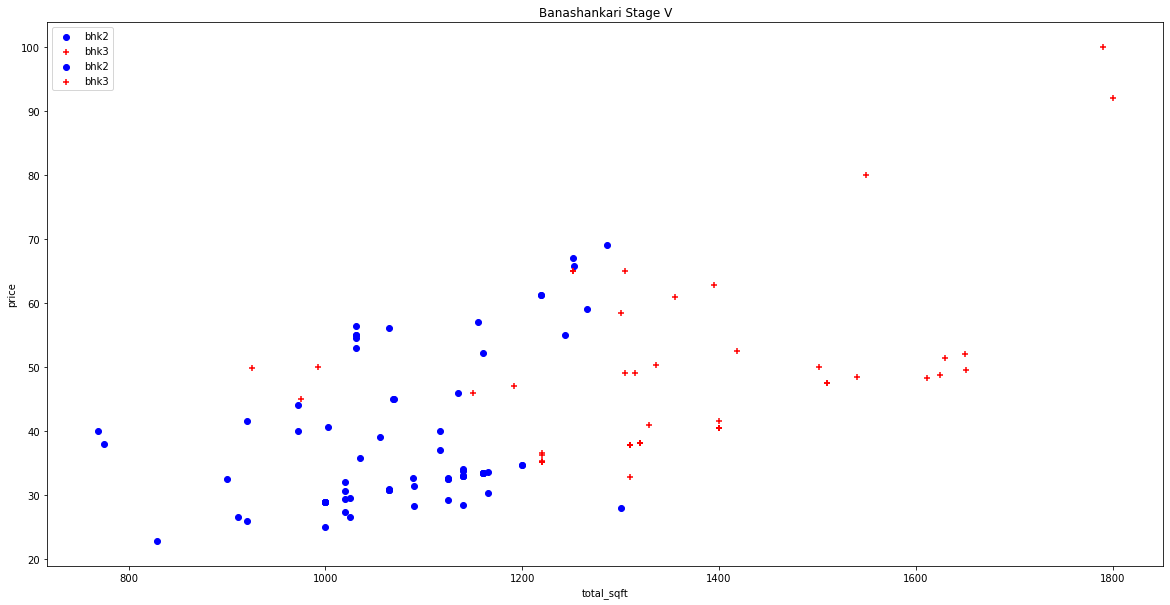

In [54]:
plot_scatter_chart(df2,'Banashankari Stage V')

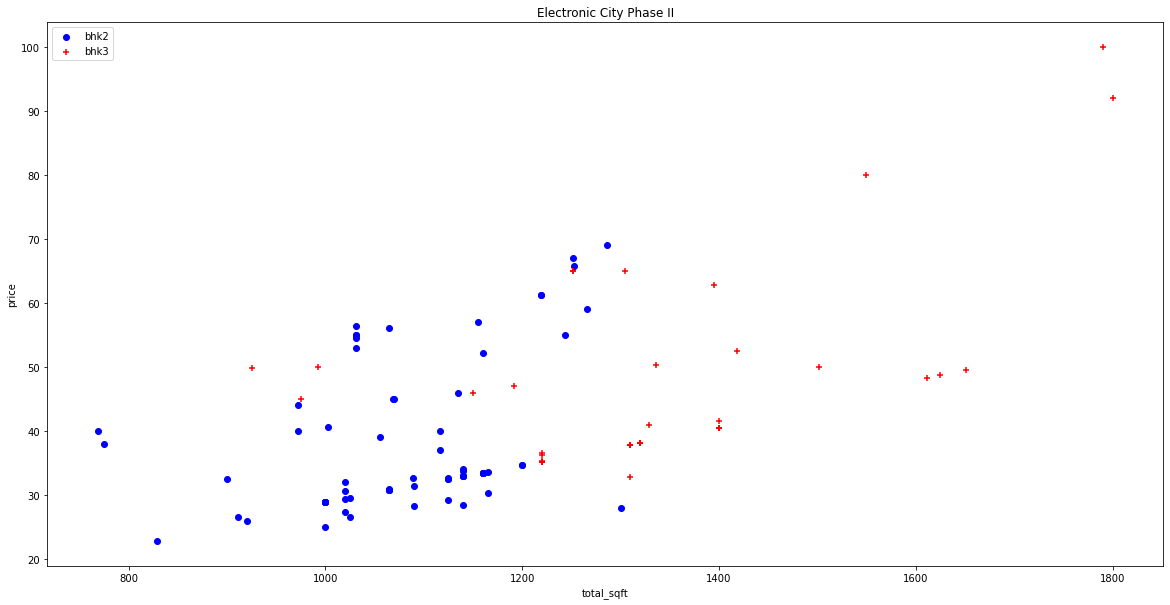

In [55]:
plot_scatter_chart(df2,'Electronic City Phase II')

In [64]:
# Removing bhk outliers based on the price of the home
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stat = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stat[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stat.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df3 = remove_bhk_outliers(df2)
df3.shape

(7164, 8)

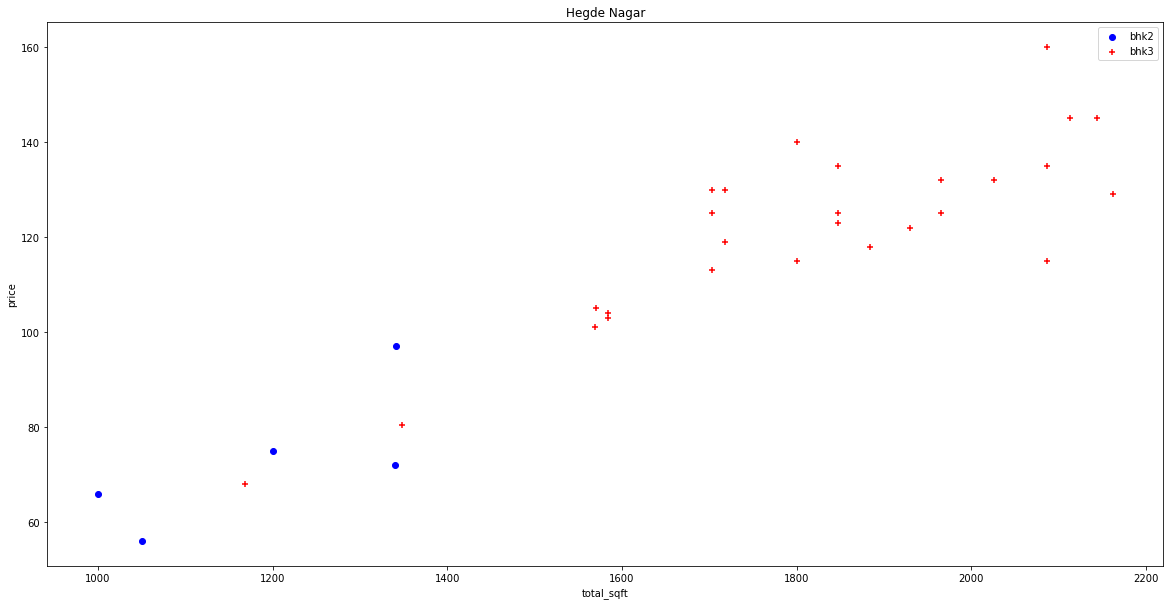

In [67]:
plot_scatter_chart(df3,'Hegde Nagar')

In [66]:
df.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Old Airport Road',
       'Rajaji Nagar', 'Marathahalli', 'other', '7th Phase JP Nagar',
       'Gottigere', 'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'Kengeri', 'Binny Pete', 'Thanisandra',
       'Bellandur', 'Electronic City', 'Ramagondanahalli', 'Yelahanka',
       'Hebbal', 'Kasturi Nagar', 'Kanakpura Road',
       'Electronics City Phase 1', 'Kundalahalli', 'Chikkalasandra',
       'Murugeshpalya', 'Sarjapur  Road', 'HSR Layout', 'Doddathoguru',
       'KR Puram', 'Bhoganhalli', 'Lakshminarayana Pura', 'Begur Road',
       'Varthur', 'Bommanahalli', 'Gunjur', 'Devarachikkanahalli',
       'Hegde Nagar', 'Haralur Road', 'Hennur Road', 'Kothannur',
       'Kalena Agrahara', 'Kaval Byrasandra', 'ISRO Layout',
       'Garudachar Palya', 'EPIP Zone', 'Dasanapura', 'Kasavanhalli',
       'Sanjay nagar', 'Domlur', 'Sarjapura - At

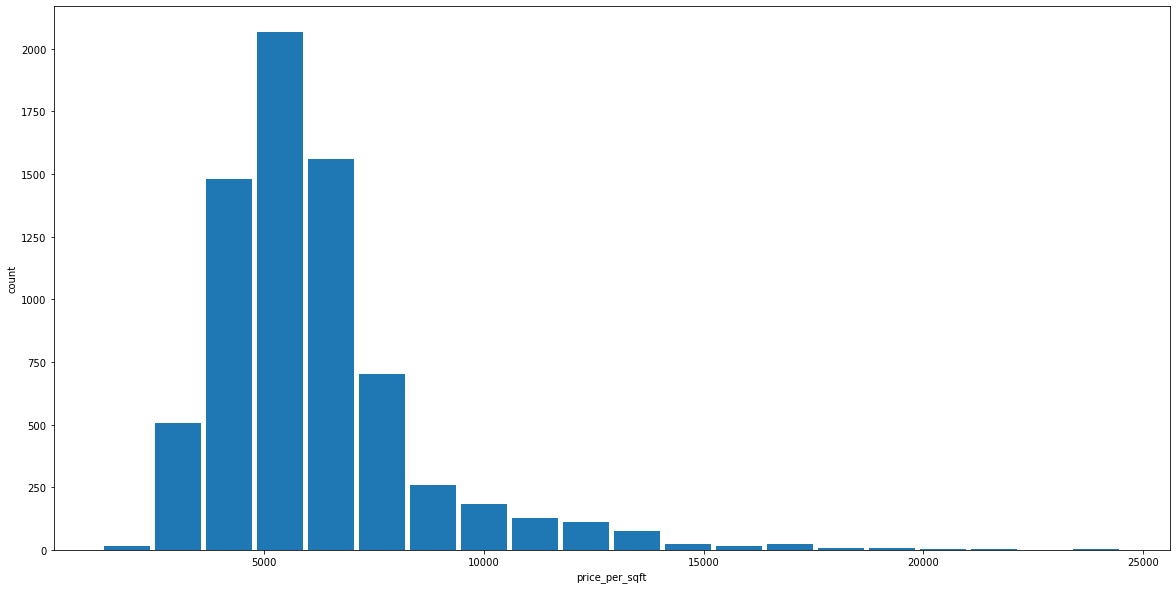

In [72]:
plt.hist(df3.price_per_sqft, rwidth=0.9, bins= 20)
plt.xlabel('price_per_sqft')
plt.ylabel('count')
plt.show()

In [73]:
df3.bath.unique()

array([ 4.,  3.,  2.,  8.,  5.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [78]:
df3[(df3.bath) > 10]

,Unnamed: 0,location,size,total_sqft,bath,price,bhk,price_per_sqft
5138,8636,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8307,3096,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8392,3609,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9106,7979,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9431,9935,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


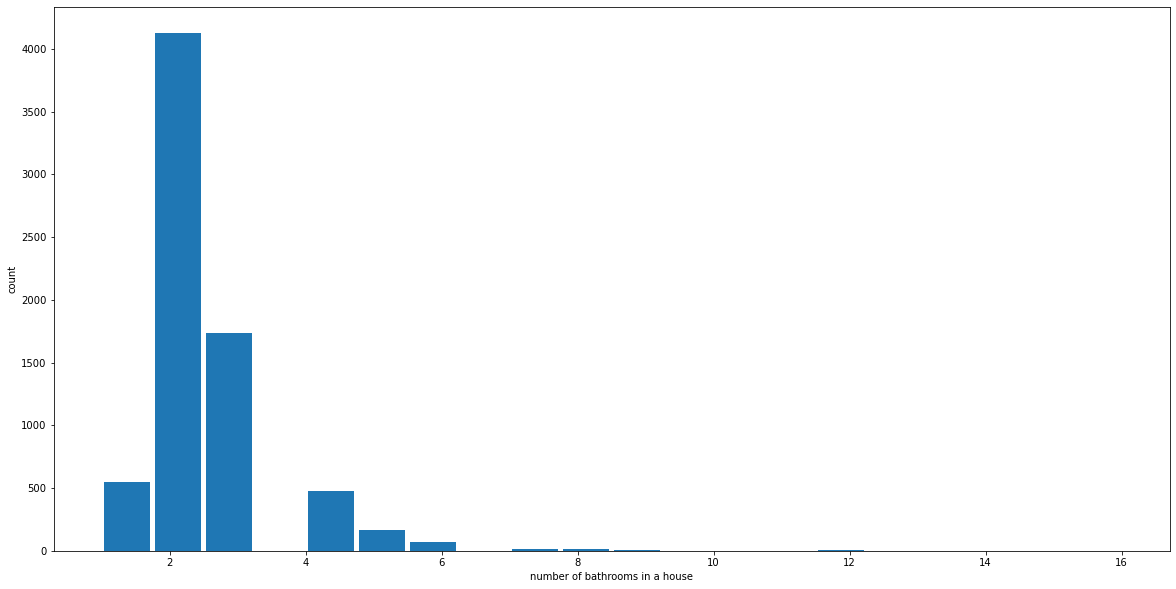

In [81]:
plt.hist(df3.bath, rwidth=0.9, bins= 20)
plt.xlabel('number of bathrooms in a house')
plt.ylabel('count')
plt.show()

In [85]:
#Cleaning the bath colomn by determining the number of bathroom within each house
df3[df3.bath > df3.bhk+2]

,Unnamed: 0,location,size,total_sqft,bath,price,bhk,price_per_sqft
1565,7709,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5099,11366,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6562,12103,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8232,2620,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [87]:
df4 = df3[df3.bath < df3.bhk+2]
df4.shape

(7088, 8)

In [92]:
df5 = df4.drop(['Unnamed: 0', 'size', 'price_per_sqft'], axis = 'columns')
df5.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [93]:
df5.shape

(7088, 5)

In [94]:
df5.to_csv('training_data.csv')